In [3]:
from pmlb import fetch_data
from eql.est import EQL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import sympy as sy
from eql.sy_utils import *

In [5]:
e = EQLgd(n_iter=10_000, drop_rate=.8, functions='id;mul;cos', reg=1e-2)
hp = {'reg': (1e-4, 1e-3, 1e-2),#(1, 1e-1, 1e-2, 5e-1, 5e-2, 5e-3),
      'n_layers': (1,2),
      'functions':(#'id;mul;cos;sin;exp;square;sqrt',
                   #'id;mul;cos;square;cube;id;mul;cos;square;cube',
                   'id;mul;cos;div;sqrt;cos;sin;div;mul;mul;cos;id',
                  )}

In [6]:
cv = GridSearchCV(estimator=e,
                 param_grid=hp,
                 cv=2,
                 #refit=True,
                 n_jobs=4,
                 verbose=5)

228_elusage
542_pollution #eher schlecht
560_bodyfat
556_analcatdata_apnea2

In [7]:
"""


1028_SWD


589_fri_c2_1000_25
227_cpu_small
294_satellite_image
197_cpu_act


"""

'\n\n\n1028_SWD\n\n\n589_fri_c2_1000_25\n227_cpu_small\n294_satellite_image\n197_cpu_act\n\n\n'

In [8]:
f = fetch_data('589_fri_c2_1000_25', local_cache_dir='./pmlb_cache')

In [15]:
f.columns

Index(['oz1', 'oz2', 'oz3', 'oz4', 'oz5', 'oz6', 'oz7', 'oz8', 'oz9', 'oz10',
       'oz11', 'oz12', 'oz13', 'oz14', 'oz15', 'oz16', 'oz17', 'oz18', 'oz19',
       'oz20', 'oz21', 'oz22', 'oz23', 'oz24', 'oz25', 'target'],
      dtype='object')

In [16]:
 mapping = {'x'+str(i):k for i,k in enumerate(f.columns)}

In [17]:
mapping

{'x0': 'oz1',
 'x1': 'oz2',
 'x2': 'oz3',
 'x3': 'oz4',
 'x4': 'oz5',
 'x5': 'oz6',
 'x6': 'oz7',
 'x7': 'oz8',
 'x8': 'oz9',
 'x9': 'oz10',
 'x10': 'oz11',
 'x11': 'oz12',
 'x12': 'oz13',
 'x13': 'oz14',
 'x14': 'oz15',
 'x15': 'oz16',
 'x16': 'oz17',
 'x17': 'oz18',
 'x18': 'oz19',
 'x19': 'oz20',
 'x20': 'oz21',
 'x21': 'oz22',
 'x22': 'oz23',
 'x23': 'oz24',
 'x24': 'oz25',
 'x25': 'target'}

In [ ]:
data_X

In [7]:
data_X.shape, data_y.shape

((1000, 25), (1000,))

In [9]:
e.fit(data_X, data_y)
e.score(data_X, data_y)

NameError: name 'data_X' is not defined

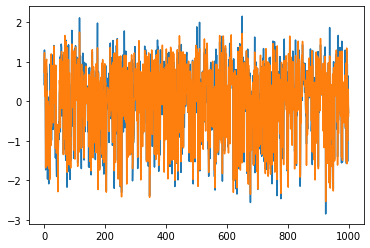

In [10]:
plt.plot(data_y)
plt.plot(cv.predict(data_X))

In [ ]:
cv.fit(data_X, data_y)
cv.score(data_X, data_y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


In [8]:
cv.predict(data_X)

DeviceArray([[ 7.41827548e-01],
             [ 1.22858906e+00],
             [ 1.33723795e-01],
             [ 3.20336521e-01],
             [ 3.95855129e-01],
             [-1.68224072e+00],
             [ 8.02331388e-01],
             [ 1.00978374e+00],
             [ 1.06541371e+00],
             [ 1.13954484e-01],
             [ 2.46652544e-01],
             [-1.62766433e+00],
             [-1.18032336e+00],
             [-2.90513039e-04],
             [-1.13393402e+00],
             [-1.69863737e+00],
             [-1.16993237e+00],
             [-1.08648777e-01],
             [-1.98252487e+00],
             [-1.83066773e+00],
             [ 2.72215307e-01],
             [ 6.74550533e-02],
             [-1.11697710e+00],
             [ 1.19988513e+00],
             [-6.49460196e-01],
             [ 3.04939568e-01],
             [ 9.03723061e-01],
             [ 8.62300813e-01],
             [ 7.77178943e-01],
             [-5.42354822e-01],
             [ 2.81069279e-02],
        

In [9]:
str(cv.best_estimator_.get_eqn())

'[-0.0811*x1 + 0.254*x3 + 0.199*x4 - 0.449*sin(0.978*x0 + 1.72*x1 - 0.471) + 1.57*sin(-0.752*sin(0.978*x0 + 1.72*x1 - 0.471) + 0.608*cos(1.48*x0 + 2.13) + 1.15) - 0.94]'

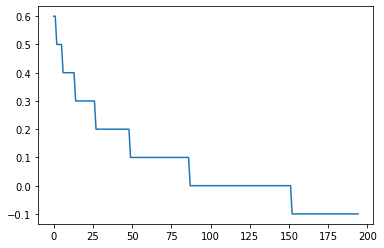

In [17]:
def sim(c):
    return round(-0.3*math.log(c / 120, 5), 1)
plt.plot([sim(x) for x in np.arange(5, 200)])

In [15]:
sim(5)

0.99